### Training Neural Networks

### Losses in Pytorch
Using the softmax function to predict class probabilities. With a softmax output, using cross-entropy as the loss. To actually calculate the loss, first define the criterion then pass in the output of your network and the correct labels.

In [3]:
#softmax gives you probabilities which will often be very close to zero or one but floating-point numbers
#can't accurately represent values near zero or one, we use log-probabilities. 
#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

# Define transform to normalize the data
# mean, std = 0.5, 0.5
tranform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

#Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=tranform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

image, label = next(iter(trainloader))
helper.imshow(image[0,:])
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/taniaincio/.pytorch/MNIST_data/
    Split: Train

In [5]:
# Build a feed-fordward network
n_input = 784
n_hiddens = [128, 64]
n_output = 10

model = nn.Sequential(nn.Linear(n_input, n_hiddens[0]),
                     nn.ReLU(),
                     nn.Linear(n_hiddens[0], n_hiddens[1]),
                     nn.ReLU(),
                     nn.Linear(n_hiddens[1], n_output),
                     nn.Softmax(dim = 1))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)
print(loss)


tensor(2.3052, grad_fn=<NllLossBackward>)


In [6]:
# TODO: it's more convenient to build the model with log-softmax output and using nn.NLLLLoss.
# USE LogSoftmax and nn.NLLLos togheter
# TODO:  nn.CrossEntropyLoss combines two functions nn.NLLLoss and LogSoftmax
# it is preferable to use nn.NLLLoss since it requires output in softmax and we can easily get probabilities by using exponential
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1))

# TODO: Define the loss
criterion = nn.NLLLoss()

### Run this to check your work
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2865, grad_fn=<NllLossBackward>)


## Autograd

Module that automatically calculating the gradients of tensors

In [7]:
# Requires_grad = True on a tensor, x.requires_grad_(True), torch.no_grad(), torch.set_grad_enabled(True|False)
x = torch.zeros(1, requires_grad = True)
with torch.no_grad():
    y = x * 2
y.requires_grad

False

In [8]:
# Example getting gradients with z.backward()
x = torch.randn(2, 2, requires_grad = True)
print(x)

y = x**2
print(y)

## grad_fn shows the function that generated this variable
print(y.grad_fn)

z = y.mean()
print(z)


z.backward()
print(x.grad)

tensor([[-1.4658,  1.0586],
        [ 1.8547,  1.3425]], requires_grad=True)
tensor([[2.1486, 1.1207],
        [3.4399, 1.8023]], grad_fn=<PowBackward0>)
tensor(2.1279, grad_fn=<MeanBackward0>)
tensor([[-0.7329,  0.5293],
        [ 0.9274,  0.6713]])


In [9]:
## For training need the gradients of the cost with respect to the weights.
## NOTE: With PyTorch, run data forward through the network to calculate the loss, then, go backwards to calculate the gradients with respect to the loss. 
## Once we have the gradients we can make a gradient descent step.

### Loss and Autograd 

In [14]:
##
n_input = 784
n_hiddens = [128, 64]
n_output = 10
model = nn.Sequential(nn.Linear(n_input, n_hiddens[0]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[0], n_hiddens[1]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[1], n_output),
                      nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0.0002, 0.0002, 0.0002,  ..., 0.0002, 0.0002, 0.0002],
        [0.0007, 0.0007, 0.0007,  ..., 0.0007, 0.0007, 0.0007],
        [0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0012, 0.0012, 0.0012,  ..., 0.0012, 0.0012, 0.0012],
        [0.0012, 0.0012, 0.0012,  ..., 0.0012, 0.0012, 0.0012]])


### Optimizer

In [29]:
# Using an optimizer to update the weights with gradients, will use Pytorch's optim
# we can use stochastic gradient descent with optim.SGD

from torch import optim

#Model
n_input = 784
n_hiddens = [128, 64]
n_output = 10
model = nn.Sequential(nn.Linear(n_input, n_hiddens[0]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[0], n_hiddens[1]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[1], n_output),
                      nn.LogSoftmax(dim = 1))

# requiere parameters to optimize and learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)
# Clear the gradients, because they are accumulated
optimizer.zero_grad()

# Data
images, label = next(iter(trainloader))
images = images.view(images.shape[0], -1)

# Forward Pass
output = model(images)

# Loss
criterion = nn.NLLLoss()
loss = criterion(output, labels)

# Backward pass
loss.backward()
#print('Gradient ', model[0].weight.grad)

# Update the weights
print('initial weights ', model[0].weight)
optimizer.step()
print('update weights ', model[0].weight)

initial weights  Parameter containing:
tensor([[-0.0071,  0.0002, -0.0063,  ...,  0.0177,  0.0043,  0.0170],
        [-0.0212, -0.0194, -0.0322,  ..., -0.0105,  0.0114,  0.0264],
        [-0.0339, -0.0109, -0.0124,  ..., -0.0131, -0.0305, -0.0015],
        ...,
        [ 0.0197,  0.0357, -0.0152,  ..., -0.0347,  0.0063, -0.0043],
        [ 0.0040,  0.0053,  0.0167,  ..., -0.0202, -0.0167,  0.0079],
        [ 0.0095, -0.0133, -0.0275,  ...,  0.0236,  0.0183,  0.0022]],
       requires_grad=True)
update weights  Parameter containing:
tensor([[-0.0071,  0.0002, -0.0063,  ...,  0.0177,  0.0043,  0.0170],
        [-0.0212, -0.0195, -0.0322,  ..., -0.0105,  0.0114,  0.0264],
        [-0.0339, -0.0109, -0.0124,  ..., -0.0131, -0.0305, -0.0015],
        ...,
        [ 0.0197,  0.0357, -0.0152,  ..., -0.0347,  0.0064, -0.0043],
        [ 0.0040,  0.0053,  0.0167,  ..., -0.0202, -0.0167,  0.0079],
        [ 0.0096, -0.0133, -0.0275,  ...,  0.0236,  0.0183,  0.0022]],
       requires_grad=True)


In [37]:
# For all data, EPOCH: one pass through the entire dataset
n_input = 784
n_hiddens = [128, 64]
n_output = 10
model = nn.Sequential(nn.Linear(n_input, n_hiddens[0]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[0], n_hiddens[1]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[1], n_output),
                      nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
# update weights
optimizer = optim.SGD(model.parameters(), lr = 0.003)
#optmizer.step()
# loop epoch
epoch = 5
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9038484609965831
Training loss: 0.836336947993429
Training loss: 0.5251990385464768
Training loss: 0.4312952893502168
Training loss: 0.3854864533903248


### Check Predicitions

torch.Size([1, 784])


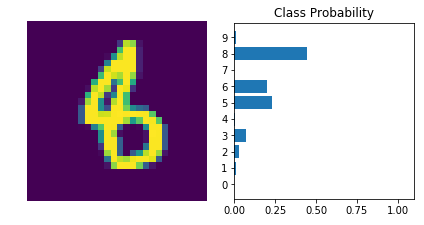

In [64]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
img = images[0].view(1, images[0].shape[0])
print(img.shape)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)
